In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

"""
Author: Ivy Vo
Task: Downloading data
"""

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'chest-xray-pneumonia:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F17810%2F23812%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240509%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240509T042250Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D247da3f5dd269c4e1532d2fc5b2e390135ebf47aecdd82b6d3cc6e6be70fa79dd842cb794eddf8b7db06da11ea4dda5a27fbe6cb116929f1bc8ed677b8163f99856503037aa443b8f0a4a3ed4b3f93a6e66a89d9ca40ff878ed3a40cdcafcb539d350a425901acf3f97bc11f2f58da4f9ba32fc78cedffd7ea469b07a8038247aca4226d206d54171b04c2fa75d947a0e6277e423fccf188dda8439c178fa93293d84c30ffd8de815fb9cd6393a5bef36643b6936a869b2d0b3813c2cb196b5c97ef452e586438567cced1c77e99cf5f95fd2ca82f953e16f2bef78ee5c9a59604ed7a8e0c27c1b7dadedcfcc01dfc17a7f2a78387750677e32647834b9b8151'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2463365435 bytes downloaded
Downloaded and uncompressed: chest-xray-pneumonia
Data source import complete.


In [ ]:
# Install required library

!pip install datasets
!pip install transformers[torch]
!pip install accelerate -U
!pip install transformers==4.30

# What is Pneumonia?
**Pneumonia is an inflammatory condition of the lung affecting primarily the small air sacs known as alveoli.Symptoms typically include some combination of productive or dry cough, chest pain, fever and difficulty breathing. The severity of the condition is variable. Pneumonia is usually caused by infection with viruses or bacteria and less commonly by other microorganisms, certain medications or conditions such as autoimmune diseases.Risk factors include cystic fibrosis, chronic obstructive pulmonary disease (COPD), asthma, diabetes, heart failure, a history of smoking, a poor ability to cough such as following a stroke and a weak immune system. Diagnosis is often based on symptoms and physical examination. Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis.The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia.**
![image.png](attachment:image.png)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

"""
Author: Ivy Vo
Task: Showing input files
"""

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Streaming output truncated to the last 5000 lines.
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0371-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0680-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1334-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0276-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0661-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1033-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1037-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1266-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1304-0001.jpeg
/kaggle/in

# Importing the necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

# Description of the Pneumonia Dataset
**The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).
Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.
For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.**

In [ ]:
"""
Author: Ivy Vo
Task: Reformatting data including resizing and re-structure
"""

from PIL import Image
from tqdm import tqdm

labels = ['PNEUMONIA', 'NORMAL']
def read_and_reformat_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label, newsize=(448, 448))
        class_num = labels.index(label)
        for img in tqdm(os.listdir(path)):
            if img.endswith('.DS_Store'):
              continue
            try:
              image = Image.open(os.path.join(path, img))
              image = image.resize(newsize).convert('RGB')
              data_one = {"image":[], "labels":[]}
              data_one["image"] = image
              data_one["labels"] = class_num
              data.append(data_one)
            except Exception as e:
              print(e)
    return data #np.array(data)

# Loading the Dataset

In [ ]:
"""
Author: Ivy Vo
Task: Loading dataset
"""

train = read_and_reformat_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/train')
test = read_and_reformat_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/test')
val = read_and_reformat_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/val')

100%|██████████| 9/9 [00:00<00:00, 57.66it/s]


# Data Visualization & Preprocessing

<Axes: xlabel='count'>

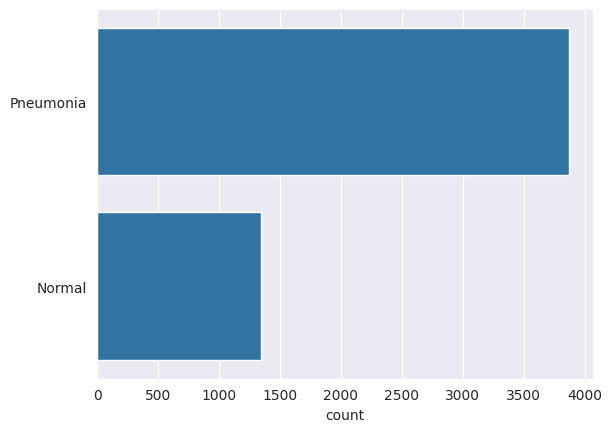

In [ ]:
"""
Author: Ivy Vo
Task: Visualize data distribution
"""

l = []
for i in train:
    if(i["labels"] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)

**The data seems imbalanced . To increase the no. of training examples, we will use data augmentation**

**Previewing the images of both the classes**

Text(0.5, 1.0, 'NORMAL')

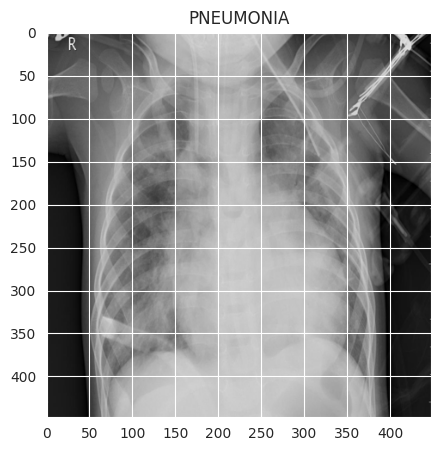

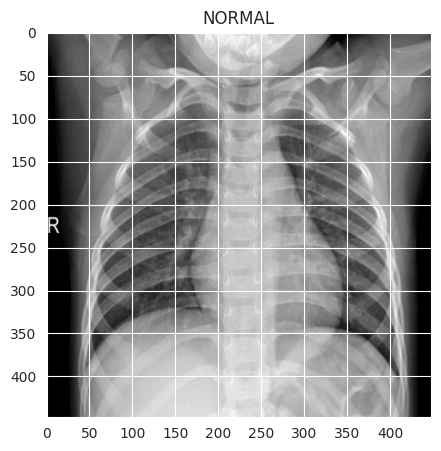

In [ ]:
"""
Author: Ivy Vo
Task: Displaying example images
"""

plt.figure(figsize = (5,5))
plt.imshow(train[0]["image"], cmap='gray')
plt.title(labels[train[0]["labels"]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1]["image"], cmap='gray')
plt.title(labels[train[-1]["labels"]])

In [ ]:
"""
Author: Ivy Vo
Task: Creating labels for training/testing dataset and do preprocessing
"""

x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)


# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255


# reshaping data
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

**We perform a grayscale normalization to reduce the effect of illumination's differences.Moreover the CNN converges faster on [0..1] data than on [0..255].**

# Data Augmentation
**In order to avoid overfitting problem, we need to expand artificially our dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations.
Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.
By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.**

For the data augmentation, i choosed to :
1. Randomly rotate some training images by 5 degrees
2. Randomly Zoom by up to 5% some training images
3. Randomly shift images horizontally by 5% of the width
4. Randomly shift images vertically by 5% of the height
Once our model is ready, we fit the training dataset.

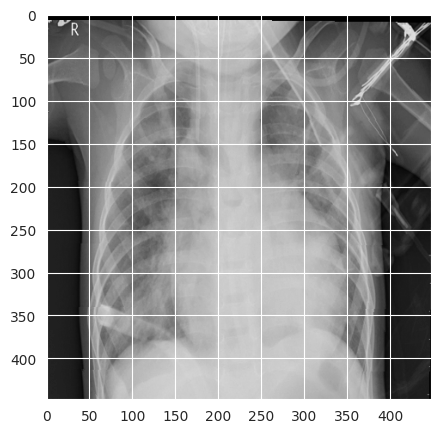

In [ ]:
"""
Author: Tai Le
Task: Data augmentation and display the resultant image
"""

from torchvision import transforms

def add_noise(image):
    noise = np.random.normal(loc=0, scale=0.1, size=list(image.size)+[3])
    noisy_image = np.array(image) + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy_image)

# Data augmentation for training
data_transforms = transforms.Compose([
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),  # Random color jitter
    transforms.RandomRotation(5),          # Random rotation up to 5 degrees
    transforms.Lambda(add_noise),          # Custom lambda function to add random white noise
    transforms.RandomAffine(degrees=0, translate=(0.02, 0.02), scale=(0.95, 1.05), shear=(0, 0.2)),  # Random stretch / scale / shear
    transforms.ToTensor(),
    ])

# Dummy data augmentation for validation / test dataset (i.e. no need any augmentation)
dummy_data_transforms = transforms.Compose([
    transforms.ToTensor(),
    ])

img = data_transforms(train[0]["image"])
img.numpy().shape
plt.figure(figsize = (5,5))
plt.imshow(img[0].numpy(), cmap='gray')

# Training the Model

In [ ]:
# prompt: Pytorch data loader with image augmentation
"""
Author: Tai Le
Task: Create Custom dataset for data loader
"""

import numpy as np
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, inputs, labels=None, transform=None):
        self.inputs = inputs
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        input_image = self.inputs[idx]
        input_image = (input_image*255).astype(np.uint8)
        input_image = np.tile(input_image, [1, 1, 3])



        input_image = transforms.ToPILImage()(input_image)
        input_image = self.transform(input_image)


        input_image = input_image[0:1]
        # input_image = transforms.ToPILImage()(input_image)

        input_image = input_image.type(torch.float32)
        input_image = input_image.to("cuda")
        if self.labels is not None:
            label = self.labels[idx]
            label = torch.tensor(label)
            label = label.type(torch.float32)
            label = label.to("cuda")
            return input_image, label
        else:
            return input_image

# Define transformation for data augmentation
def add_noise(image):
    noise = np.random.normal(loc=0, scale=0.1, size=list(image.size)+[3])
    noisy_image = np.array(image) + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy_image)

train_dataset = CustomDataset(x_train, labels=y_train, transform=data_transforms)
val_dataset = CustomDataset(x_val, labels=y_val, transform=dummy_data_transforms)
test_dataset = CustomDataset(x_test, labels=y_test, transform=dummy_data_transforms)


In [ ]:
"""
Author: Tai Le
Task: Define binary accuraccy function
"""

def binary_accuracy(y_pred, y_true):
    """
    Compute the binary accuracy of the predictions given the true binary labels.

    Args:
    - y_pred (torch.Tensor): Predicted probabilities or logits for binary classification (shape: [batch_size]).
    - y_true (torch.Tensor): True binary labels (shape: [batch_size]).

    Returns:
    - accuracy (float): Binary accuracy of the predictions.
    """
    # Convert predicted probabilities/logits to binary predictions
    binary_predictions = (y_pred >= 0.5).float()

    # Compare binary predictions with true labels
    correct_predictions = torch.eq(binary_predictions, y_true).sum().item()

    # Calculate binary accuracy
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions

    return accuracy

### VisionTransformer

The Vision Transformer (ViT) is an advanced model for image recognition that works differently from traditional convolutional neural networks (CNNs). Instead of processing the whole image with convolutional layers, ViT splits the image into smaller patches and processes these patches like words in a sentence using a Transformer, a technique originally developed for natural language processing. This approach allows ViT to capture detailed relationships across the entire image, leading to highly accurate results in tasks like image classification.

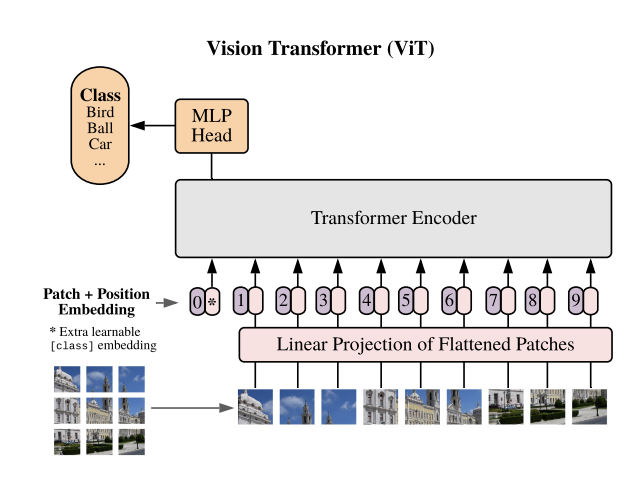


In [ ]:
"""
Author: Nhat Trinh
(Reference:
 https://github.com/yukimasano/PASS/blob/main/vision_transformer.py,
 https://github.com/pytorch/vision/blob/main/torchvision/models/vision_transformer.py)
Task: Define VisionTransform architecture with some modification
"""

import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        assert self.head_dim * num_heads == embed_dim, "Embedding dimension must be divisible by number of heads"

        self.query = nn.Linear(embed_dim, embed_dim)
        self.key = nn.Linear(embed_dim, embed_dim)
        self.value = nn.Linear(embed_dim, embed_dim)
        self.fc_out = nn.Linear(embed_dim, embed_dim)

    def forward(self, query, key, value, mask=None):
        batch_size = query.shape[0]

        # Linearly project queries, keys, and values
        Q = self.query(query)
        K = self.key(key)
        V = self.value(value)

        # Split into multiple heads
        Q = Q.view(batch_size, -1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)  # (batch_size, num_heads, seq_len, head_dim)
        K = K.view(batch_size, -1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.view(batch_size, -1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)

        # Compute scaled dot-product attention
        energy = torch.matmul(Q, K.permute(0, 1, 3, 2)) / (self.head_dim ** 0.5)
        if mask is not None:
            energy = energy.masked_fill(mask == 0, float('-inf'))  # Masked positions have -inf
        attention = F.softmax(energy, dim=-1)
        x = torch.matmul(attention, V)

        # Combine heads and apply final linear transformation
        x = x.permute(0, 2, 1, 3).contiguous().view(batch_size, -1, self.embed_dim)
        x = self.fc_out(x)
        return x

class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, ff_hidden_dim, dropout):
        super(TransformerBlock, self).__init__()
        self.attention = MultiHeadAttention(embed_dim, num_heads)
        self.feedforward = nn.Sequential(
            nn.Linear(embed_dim, ff_hidden_dim),
            nn.ReLU(),
            nn.Linear(ff_hidden_dim, embed_dim)
        )
        self.dropout = nn.Dropout(dropout)
        self.layer_norm1 = nn.LayerNorm(embed_dim)
        self.layer_norm2 = nn.LayerNorm(embed_dim)

    def forward(self, x, mask):
        attention_output = self.attention(x, x, x, mask)
        x = self.layer_norm1(x + self.dropout(attention_output))
        feedforward_output = self.feedforward(x)
        x = self.layer_norm2(x + self.dropout(feedforward_output))
        return x

class VisionTransformer(nn.Module):
    def __init__(self, num_classes, image_size=150, patch_size=16, num_layers=12, embed_dim=256, num_heads=8, ff_hidden_dim=512, dropout=0.1):
        super(VisionTransformer, self).__init__()
        self.patch_dim = embed_dim
        self.num_patches = (image_size // patch_size) ** 2
        self.patch_embed = nn.Conv2d(1, self.patch_dim, kernel_size=patch_size, stride=patch_size, bias=False)
        self.pos_embed = nn.Parameter(torch.zeros(1, self.num_patches + 1, embed_dim))
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.dropout = nn.Dropout(dropout)
        self.transformer_blocks = nn.ModuleList([
            TransformerBlock(embed_dim, num_heads, ff_hidden_dim, dropout) for _ in range(num_layers)
        ])
        self.layer_norm = nn.LayerNorm(embed_dim)
        self.fc = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        B, C, H, W = x.shape

        # Patch embedding
        x = self.patch_embed(x)  # (B, patch_dim, L, L)
        x = x.flatten(2).transpose(1, 2)  # (B, num_patches, patch_dim)

        # Add class token and positional embeddings
        cls_tokens = self.cls_token.expand(B, -1, -1)  # (B, 1, patch_dim)
        x = torch.cat((cls_tokens, x), dim=1)  # (B, num_patches + 1, patch_dim)
        x += self.pos_embed  # (B, num_patches + 1, patch_dim)

        # Transformer blocks
        for transformer_block in self.transformer_blocks:
            x = transformer_block(x, mask=None)

        # Aggregate embeddings
        x = self.layer_norm(x[:, 0])  # Only take the class token
        x = self.dropout(x)

        # Classification head
        x = self.fc(x)
        return x


In [ ]:
"""
Author: Nhat Trinh
Task: Train model (ViT)
"""

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm
from sklearn.metrics import classification_report,confusion_matrix


batch_size = 64*2
# # Create the DataLoader for the training data
train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
)

# # Create the DataLoader for the validation data
val_dataloader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=True,
)

# # Create the DataLoader for the test data
test_dataloader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=True,
)

# Create ViT model
model = VisionTransformer(num_classes=1, image_size=150,
                          patch_size=30, num_layers=12,
                          embed_dim=256//4, num_heads=8,
                          ff_hidden_dim=512//4,
                          dropout=0.1).to("cuda")

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Number of trainable parameters in the model: {count_parameters(model)}")

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)

# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=1.0)  # Decrease LR by a factor of 0.1 every 5 epochs

# Training loop
num_epochs = 30
history = {"train":{"accuracy":[]}, "val":{"accuracy":[]}, "test":{"accuracy":[]}}
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    val_running_loss = 0.0
    train_accuracy = []
    for inputs, labels in tqdm(train_dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.flatten(), labels.flatten())
        outputs = torch.sigmoid(outputs)
        train_accuracy.append(binary_accuracy(outputs.flatten(), labels.flatten()))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    history["train"]["accuracy"].append(np.mean(train_accuracy))

    val_accuracy = []
    for inputs, labels in tqdm(val_dataloader):
        outputs = model(inputs)
        loss = criterion(outputs.flatten(), labels.flatten())
        val_running_loss += loss.item()
        outputs = torch.sigmoid(outputs)
        val_accuracy.append(binary_accuracy(outputs.flatten(), labels.flatten()))
    history["val"]["accuracy"].append(np.mean(val_accuracy))

    test_accuracy = []
    test_label = []
    for inputs, labels in tqdm(test_dataloader):
        outputs = model(inputs)
        outputs = torch.sigmoid(outputs)
        test_accuracy.append(binary_accuracy(outputs.flatten(), labels.flatten()))
    history["test"]["accuracy"].append(np.mean(test_accuracy))

    scheduler.step()  # Update the learning rate scheduler

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_dataloader)}/{val_running_loss/len(val_dataloader)}, \
      train accuracy: {history['train']['accuracy'][-1]}, \
      val accuracy: {history['val']['accuracy'][-1]}, \
      test accuracy: {history['test']['accuracy'][-1]} \
    ")

In [ ]:
"""
Author: Nhat Trinh
Task: Display precision, recall, f1-score, and support
"""

# test_accuracy = []
test_predictions = []
test_labels = []
for inputs, labels in tqdm(test_dataloader):
    outputs = model(inputs)
    outputs = torch.sigmoid(outputs)
    test_predictions.append(outputs.detach().cpu().numpy())
    test_labels.append(labels.detach().cpu().numpy())

y_test_label = np.concatenate(test_labels).flatten()
x_test_predictions = (np.concatenate(test_predictions).flatten() > 0.5).astype(np.float32)
print('\n')
print(classification_report(y_test_label, x_test_predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

100%|██████████| 20/20 [00:00<00:00, 23.44it/s]



                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.92      0.98      0.95       390
   Normal (Class 1)       0.97      0.85      0.91       234

           accuracy                           0.94       624
          macro avg       0.94      0.92      0.93       624
       weighted avg       0.94      0.94      0.93       624



# Analysis after Model Training

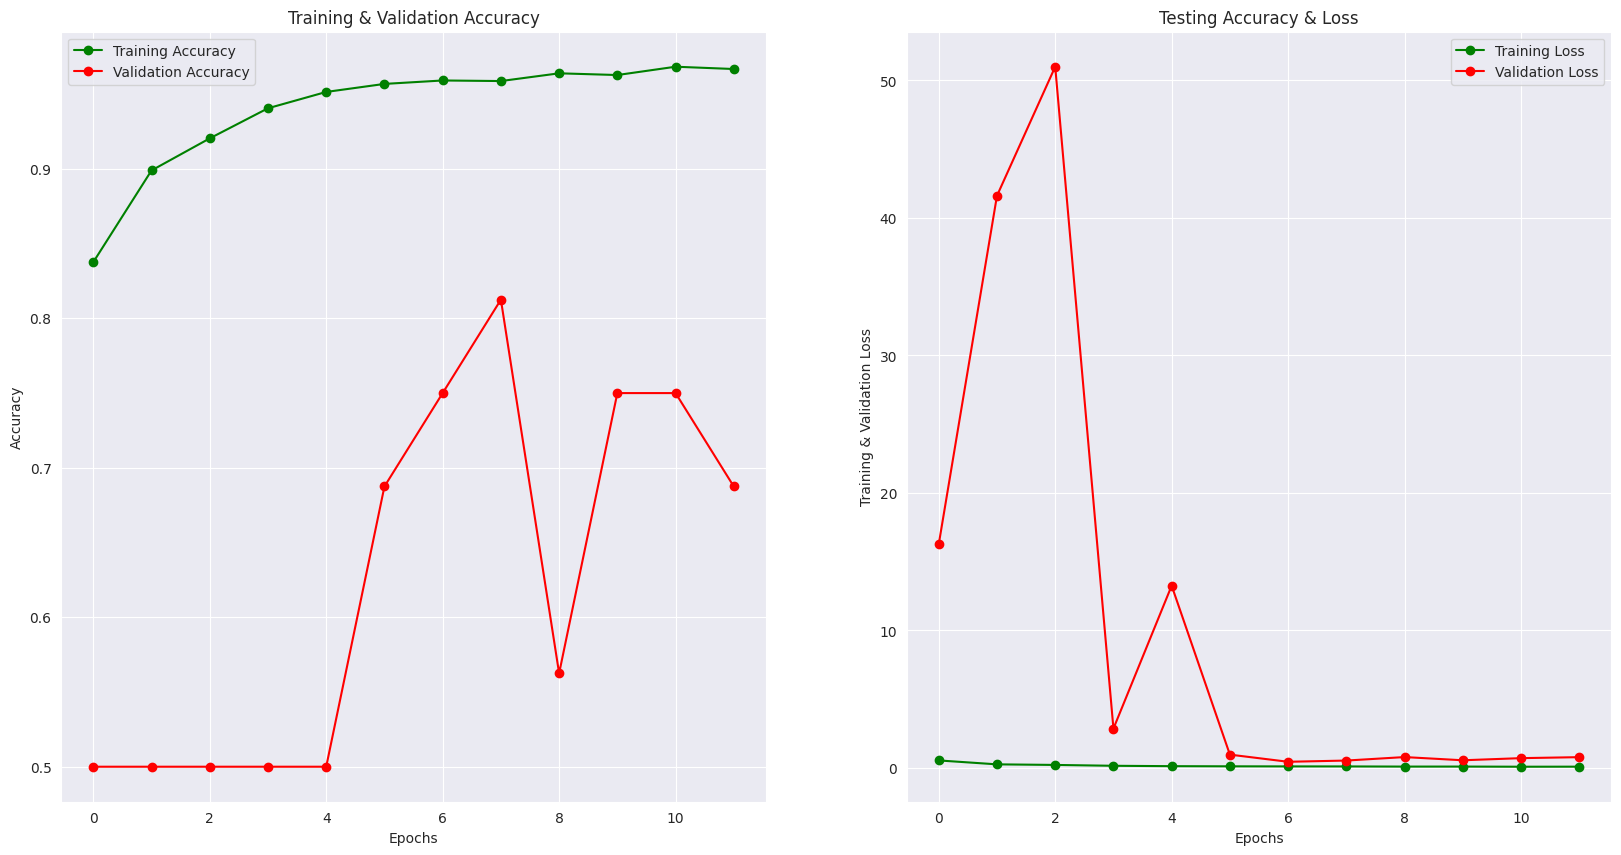

In [ ]:
"""
Author: Nhat Trinh
Task: Analysis and graph plot
"""

epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()